In [1]:
# write your code here
# type your code here
# to perform algebraic calculation
import numpy as np

# to operate the datasets and dataframes
import pandas as pd   
 
# for kmeans clustering
from sklearn.cluster import KMeans   

# to convert data into standard form
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer


# to visualize data
import seaborn as sns 

# to plot graphs
import matplotlib.pyplot as plt  
import matplotlib.cm as cm

# to calculate silhouette_score
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples

# filter the warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans   

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Null Values

In [3]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Skewness

In [4]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [5]:
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

In [8]:
df['Administrative_Duration'].value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64

In [9]:
df['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

In [10]:
df['Informational_Duration'].value_counts()

0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64

In [11]:
df['ProductRelated'].value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [12]:
df['BounceRates'].value_counts()

0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: BounceRates, Length: 1872, dtype: int64

In [13]:
df['ExitRates'].value_counts()

0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: ExitRates, Length: 4777, dtype: int64

In [14]:
df['PageValues'].value_counts()

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

In [15]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [16]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [17]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [18]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [19]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [20]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [21]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [22]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [23]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [24]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Analysis

Uni-Variate

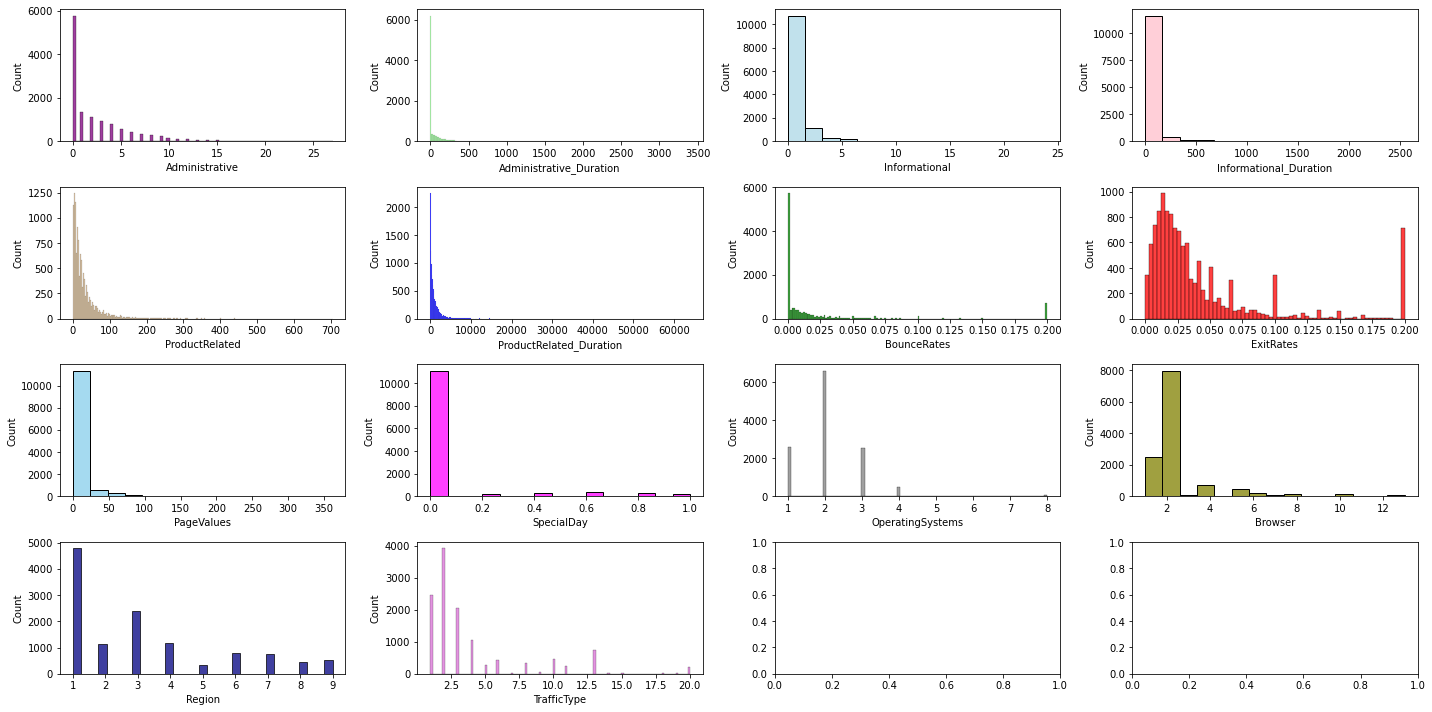

In [26]:
df_num = df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(20,10))
j=['purple','lightgreen','lightblue','pink','tan','blue','green','red',
   'skyblue','magenta','grey','olive','navy','orchid','blueviolet','plum']
k = 0
for var, subplot in zip(df_num.columns[:], ax.flatten()):
    sns.histplot(df_num[var], ax=subplot,color=j[k])
    k += 1
    
plt.tight_layout()
plt.show()

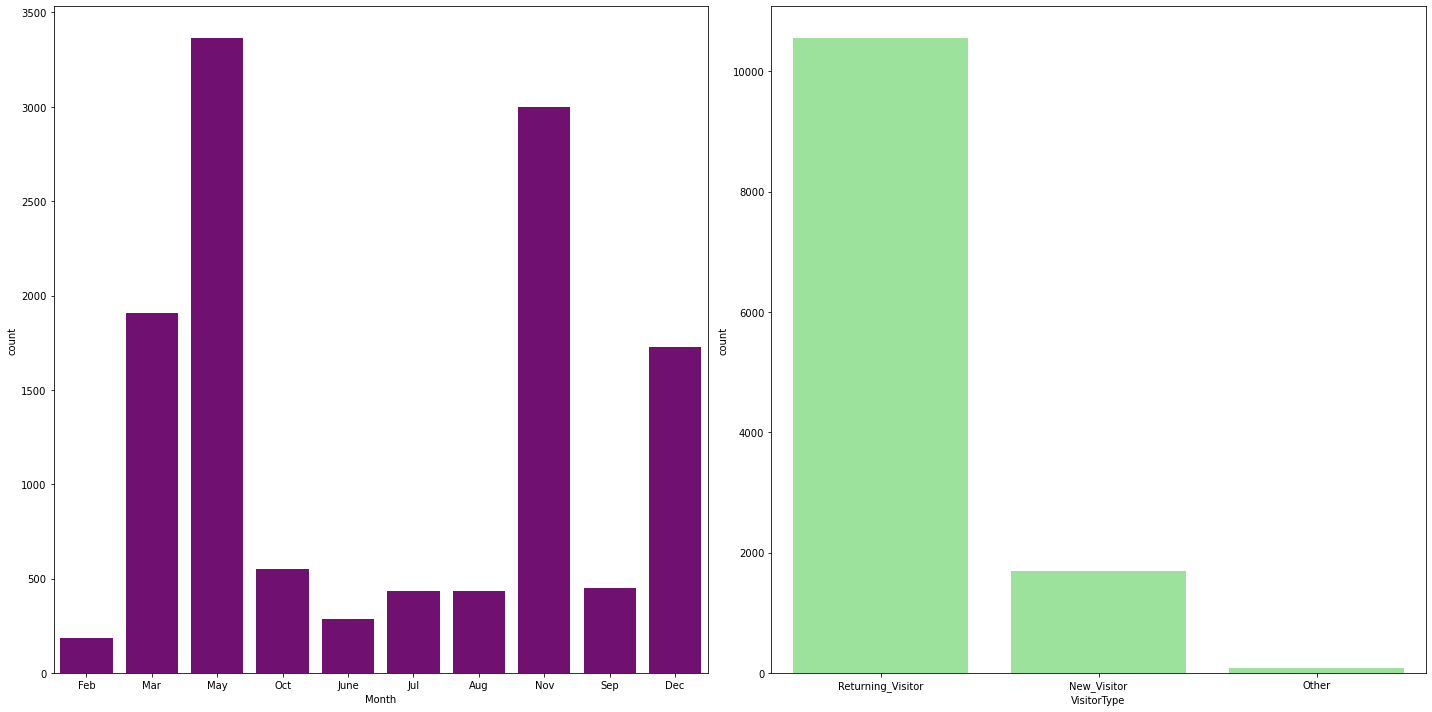

In [27]:
df_cat = df.select_dtypes(include=[np.object])
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
j=['purple','lightgreen','lightblue','pink','tan','blue','green','red',
   'skyblue','magenta','grey','olive','navy','orchid','blueviolet','plum']
k = 0
for var, subplot in zip(df_cat.columns[:], ax.flatten()):
    sns.countplot(df_cat[var], ax=subplot,color=j[k])
    k += 1
    
plt.tight_layout()
plt.show()

Bi-Variate

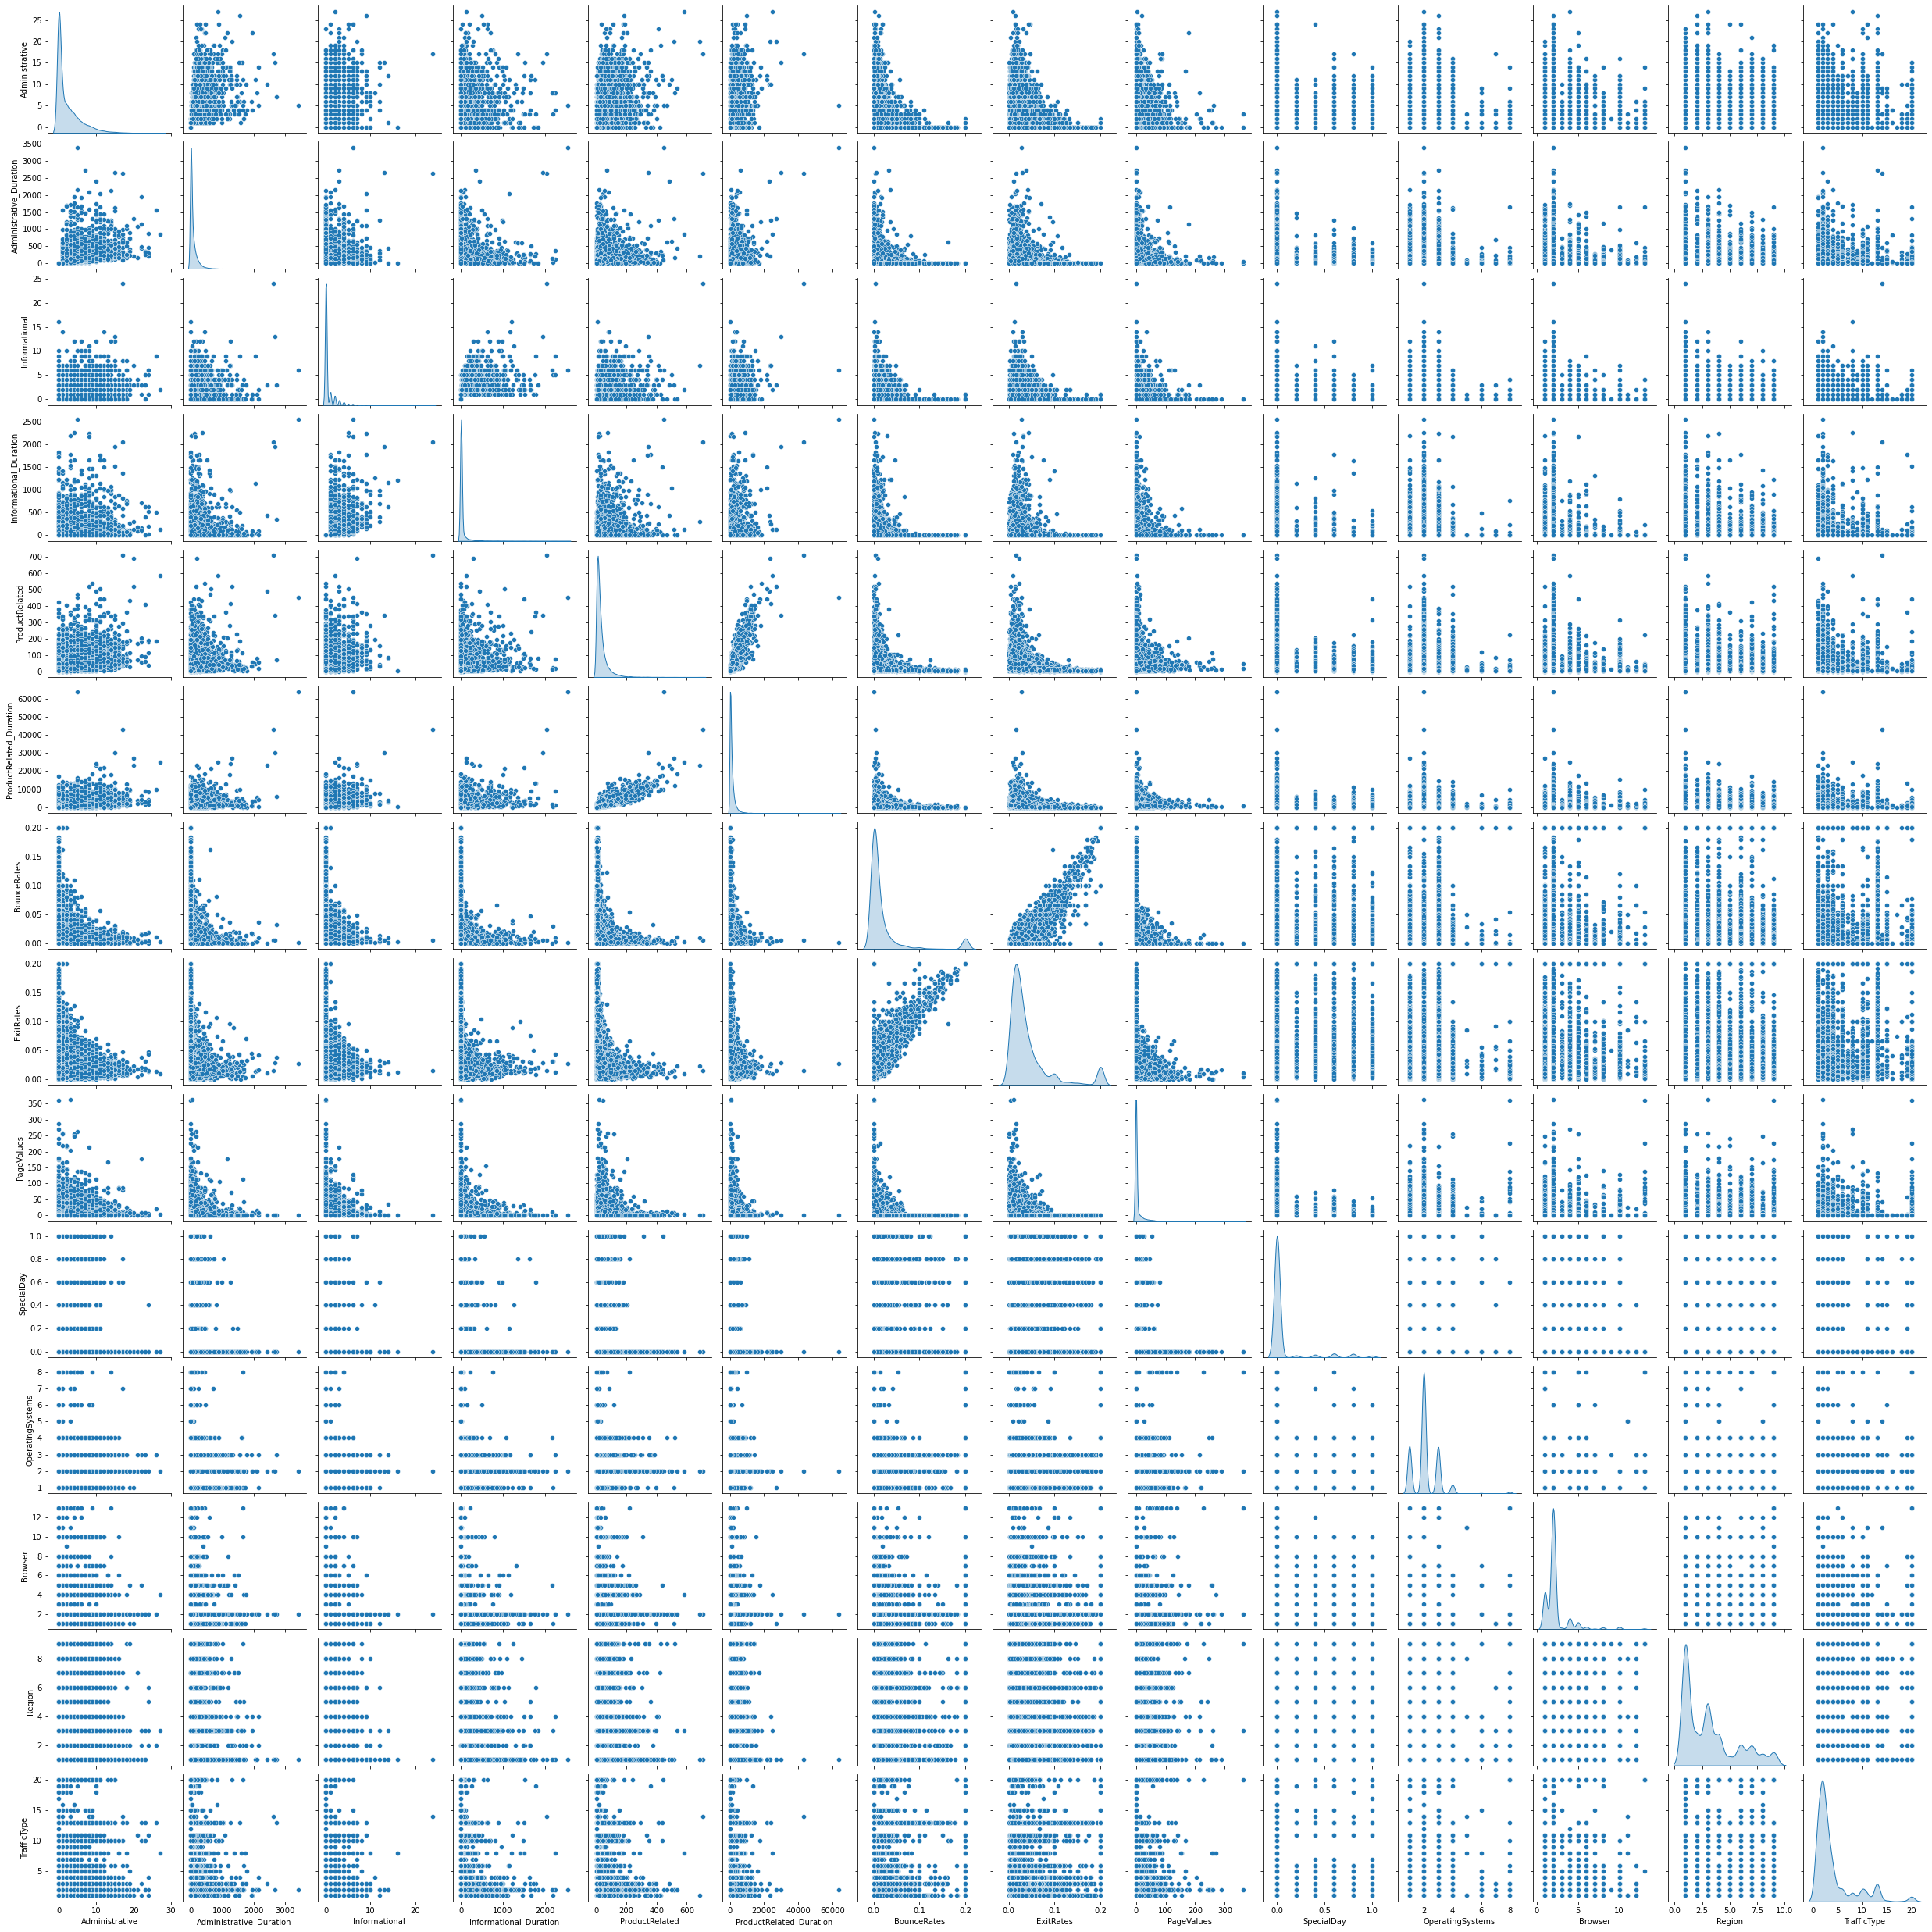

In [28]:
sns.pairplot(df_num, diag_kind='kde')

Multi-Variate

<AxesSubplot:>

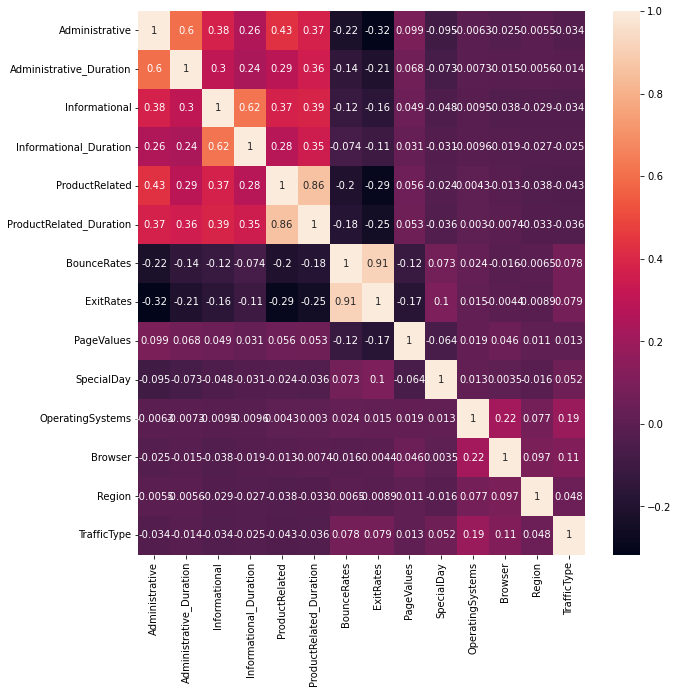

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(),annot=True)

In [30]:
df_num.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
dtype: float64

Outlier treatment

In [31]:
X = df_num
PT_yj = PowerTransformer(method='yeo-johnson')
trans_X = pd.DataFrame(PT_yj.fit_transform((X)),columns = X.columns)
trans_X.skew()

Administrative             0.243728
Administrative_Duration    0.145485
Informational              1.404111
Informational_Duration     1.546903
ProductRelated            -0.002576
ProductRelated_Duration   -0.036336
BounceRates                1.032599
ExitRates                  0.433598
PageValues                 1.377420
SpecialDay                 2.640515
OperatingSystems          -0.010325
Browser                   -0.001701
Region                     0.130311
TrafficType                0.151907
dtype: float64

Standardisation

In [32]:
# write your code here
scaled_df= StandardScaler().fit_transform(df_num)

# to print 'df_s'
df_s = pd.DataFrame(scaled_df, columns = df_num.columns)
df_s

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,2.058618,2.121412,-0.894178,-0.762629
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,0.976499
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,2.218733
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,-0.136078,-0.207952,-0.061364,1.721839


Encoding

In [33]:
df_cat.head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [34]:
encode2 = pd.get_dummies(df_cat['Month'],drop_first=True,prefix='Month')
encode6 = pd.get_dummies(df_cat['VisitorType'],drop_first=True,prefix='VisitorType')
df_s = pd.concat([df_s, encode6, encode2],axis=1)


Clustering

In [40]:
wcss = []

# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(1,20):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_s)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
print(wcss)

[183874.8140308192, 160130.33484182795, 140495.6026465081, 130162.4798307, 122408.28166910185, 115496.93771458286, 109501.80473655116, 103231.22903509517, 97490.01527816818, 92559.70255132206, 89601.76832273755, 85683.39986174605, 82741.66009677354, 79927.06700329643, 77544.488308977, 76140.78812921308, 74776.72032685153, 72696.2214575772, 71865.64039252853]


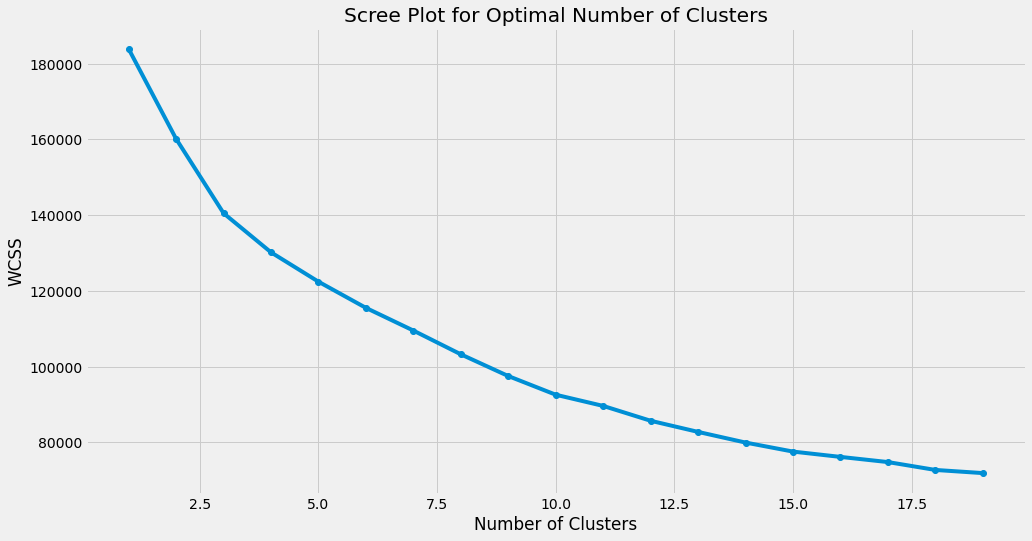

In [41]:
plt.style.use("fivethirtyeight")

# set the plot size using 'figsize'
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,20), wcss, marker='o') 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")

# display the plot
plt.show()

In [42]:
silhouette_coefficients = []

# use 'for' loop to build the clusters
# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(2,20):
    
    # perform K-means with different K values
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(df_s)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(df_s,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)
    
# print the silhouette coefficients
print(silhouette_coefficients)

[0.29954996562888914, 0.29034954047748945, 0.24555027467565332, 0.21273807211230567, 0.2106683126554598, 0.16633627490810143, 0.20137716242201836, 0.16549586887521114, 0.17159842857599258, 0.1711489135819853, 0.17723000510746462, 0.15797419129812493, 0.15757954306164837, 0.15905660032673583, 0.1595271392047811, 0.14696789617912928, 0.15302099865551708, 0.16155715320043698]


In [38]:
link_mat2 = linkage(df_s, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat2[0:10])

[[4.2240e+03 4.4890e+03 0.0000e+00 2.0000e+00]
 [1.0037e+04 1.1043e+04 0.0000e+00 2.0000e+00]
 [8.1950e+03 9.5680e+03 0.0000e+00 2.0000e+00]
 [5.7700e+02 1.8960e+03 0.0000e+00 2.0000e+00]
 [3.9560e+03 5.0560e+03 0.0000e+00 2.0000e+00]
 [2.6190e+03 3.8910e+03 0.0000e+00 2.0000e+00]
 [2.5540e+03 3.6500e+03 0.0000e+00 2.0000e+00]
 [2.4230e+03 4.5520e+03 0.0000e+00 2.0000e+00]
 [5.1990e+03 1.2337e+04 0.0000e+00 3.0000e+00]
 [2.5200e+03 5.0380e+03 0.0000e+00 2.0000e+00]]


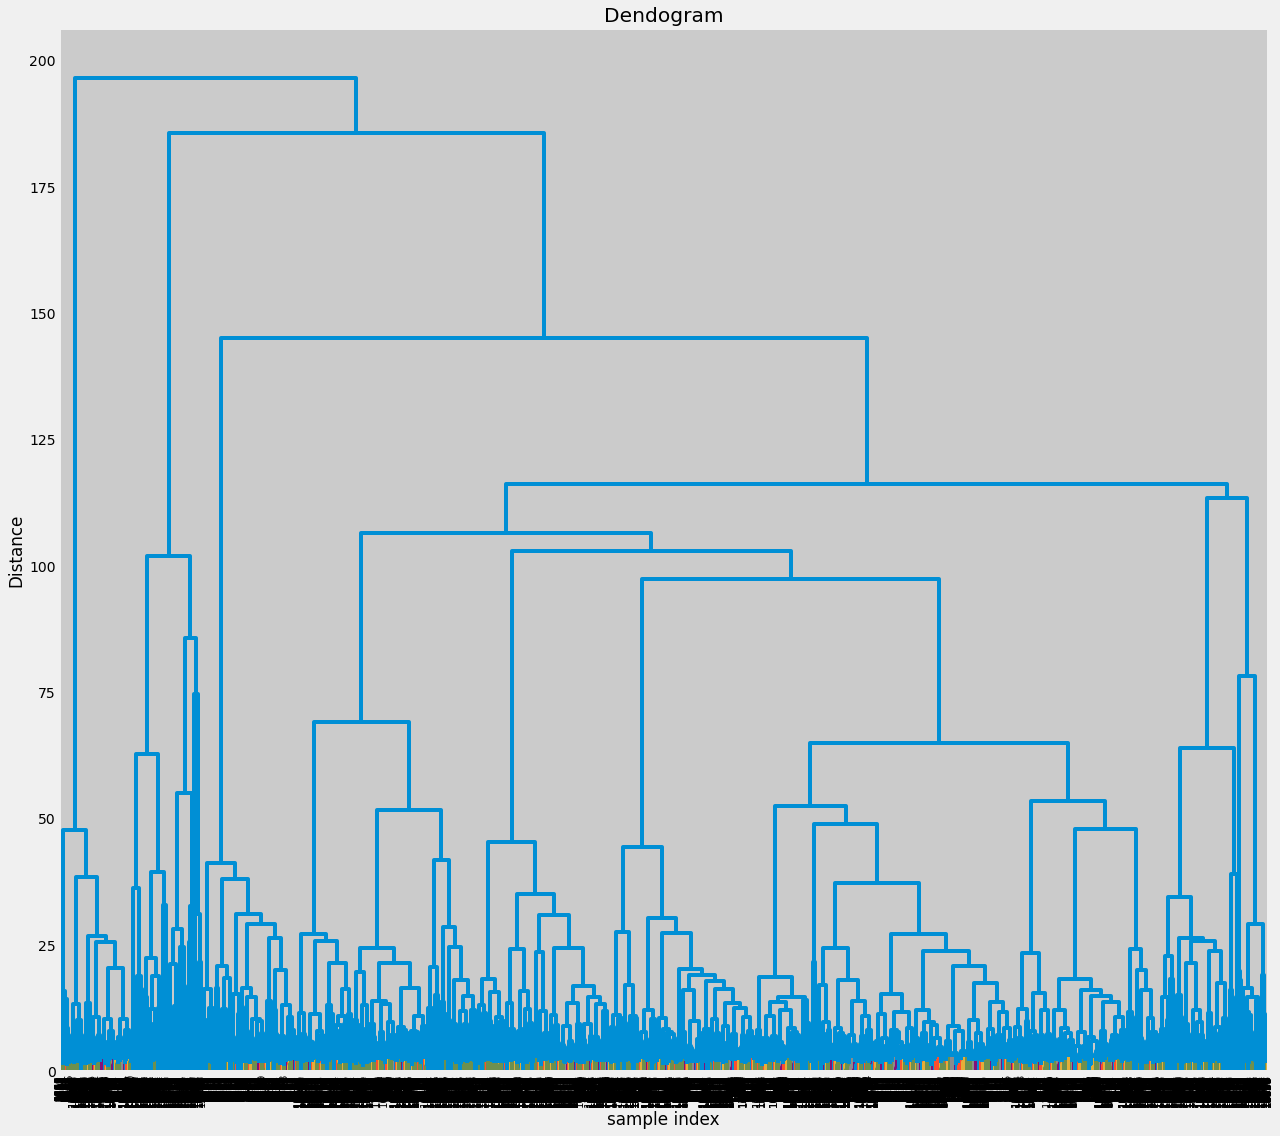

In [39]:
plt.figure(figsize=(18, 16))
plt.title('Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_mat2,leaf_rotation=90.0,p=25,color_threshold=3,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [43]:
pca = PCA(n_components=0.8)
pca.fit(df_s)
print(pca.components_)
print()
print(pca.explained_variance_)
print()
print(pca.explained_variance_ratio_)

[[ 3.80692241e-01  3.27199609e-01  3.46350140e-01  2.94446213e-01
   4.10708515e-01  4.12319231e-01 -2.78354418e-01 -3.24351137e-01
   9.28216606e-02 -7.46662016e-02 -1.40518293e-02 -1.80651969e-02
  -2.06717798e-02 -5.16111465e-02 -2.01719871e-03  1.41008994e-03
  -6.30375929e-04 -5.53103086e-03  7.49434540e-04 -1.23665185e-03
  -1.27603623e-02 -2.78517160e-02  3.38828963e-02  5.80734298e-03
   4.26235303e-03]
 [ 5.20108550e-02  1.05553721e-01  2.78524046e-01  2.99917347e-01
   1.53590514e-01  1.93415533e-01  6.01345266e-01  5.72527987e-01
  -1.86923163e-01  1.18330397e-01  1.90645555e-02 -5.34044556e-02
  -6.27740777e-02  8.28219070e-02 -3.43231425e-04  6.32427540e-02
  -1.16198717e-02  3.98642866e-03  1.36234477e-03  4.40037179e-03
  -1.41599009e-02  2.73180919e-02  5.77241098e-03 -8.35289315e-03
  -6.59681351e-03]
 [ 3.15804624e-02  3.93383221e-02 -1.78439845e-02 -1.42639002e-02
   3.38786181e-02  3.85283546e-02  1.22012719e-02  3.81195504e-04
   1.26504534e-01  4.51548664e-02  5.9

In [45]:
df_pca = pd.DataFrame(pca.transform(df_s))
df_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-3.154963,3.601713,-1.897039,-1.035781,-0.906517,-0.113050,0.616179,0.578892,0.425145
1,-1.355060,-0.036612,-0.854462,-0.110745,0.126853,-0.299834,0.535911,-0.526836,0.411607
2,-3.295730,3.496512,1.303167,-1.540926,-0.823031,-0.689612,-1.476609,1.058086,-0.443988
3,-1.971978,1.084511,0.172476,-0.378395,-0.128031,-0.283836,0.524555,-0.491822,0.183572
4,-0.992436,-0.262093,0.377373,0.153159,0.087131,-0.481518,0.806222,-0.865903,0.465900


In [47]:
df_pca['Revenue'] = df['Revenue']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Revenue
0,-3.154963,3.601713,-1.897039,-1.035781,-0.906517,-0.113050,0.616179,0.578892,0.425145,False
1,-1.355060,-0.036612,-0.854462,-0.110745,0.126853,-0.299834,0.535911,-0.526836,0.411607,False
2,-3.295730,3.496512,1.303167,-1.540926,-0.823031,-0.689612,-1.476609,1.058086,-0.443988,False
3,-1.971978,1.084511,0.172476,-0.378395,-0.128031,-0.283836,0.524555,-0.491822,0.183572,False
4,-0.992436,-0.262093,0.377373,0.153159,0.087131,-0.481518,0.806222,-0.865903,0.465900,False


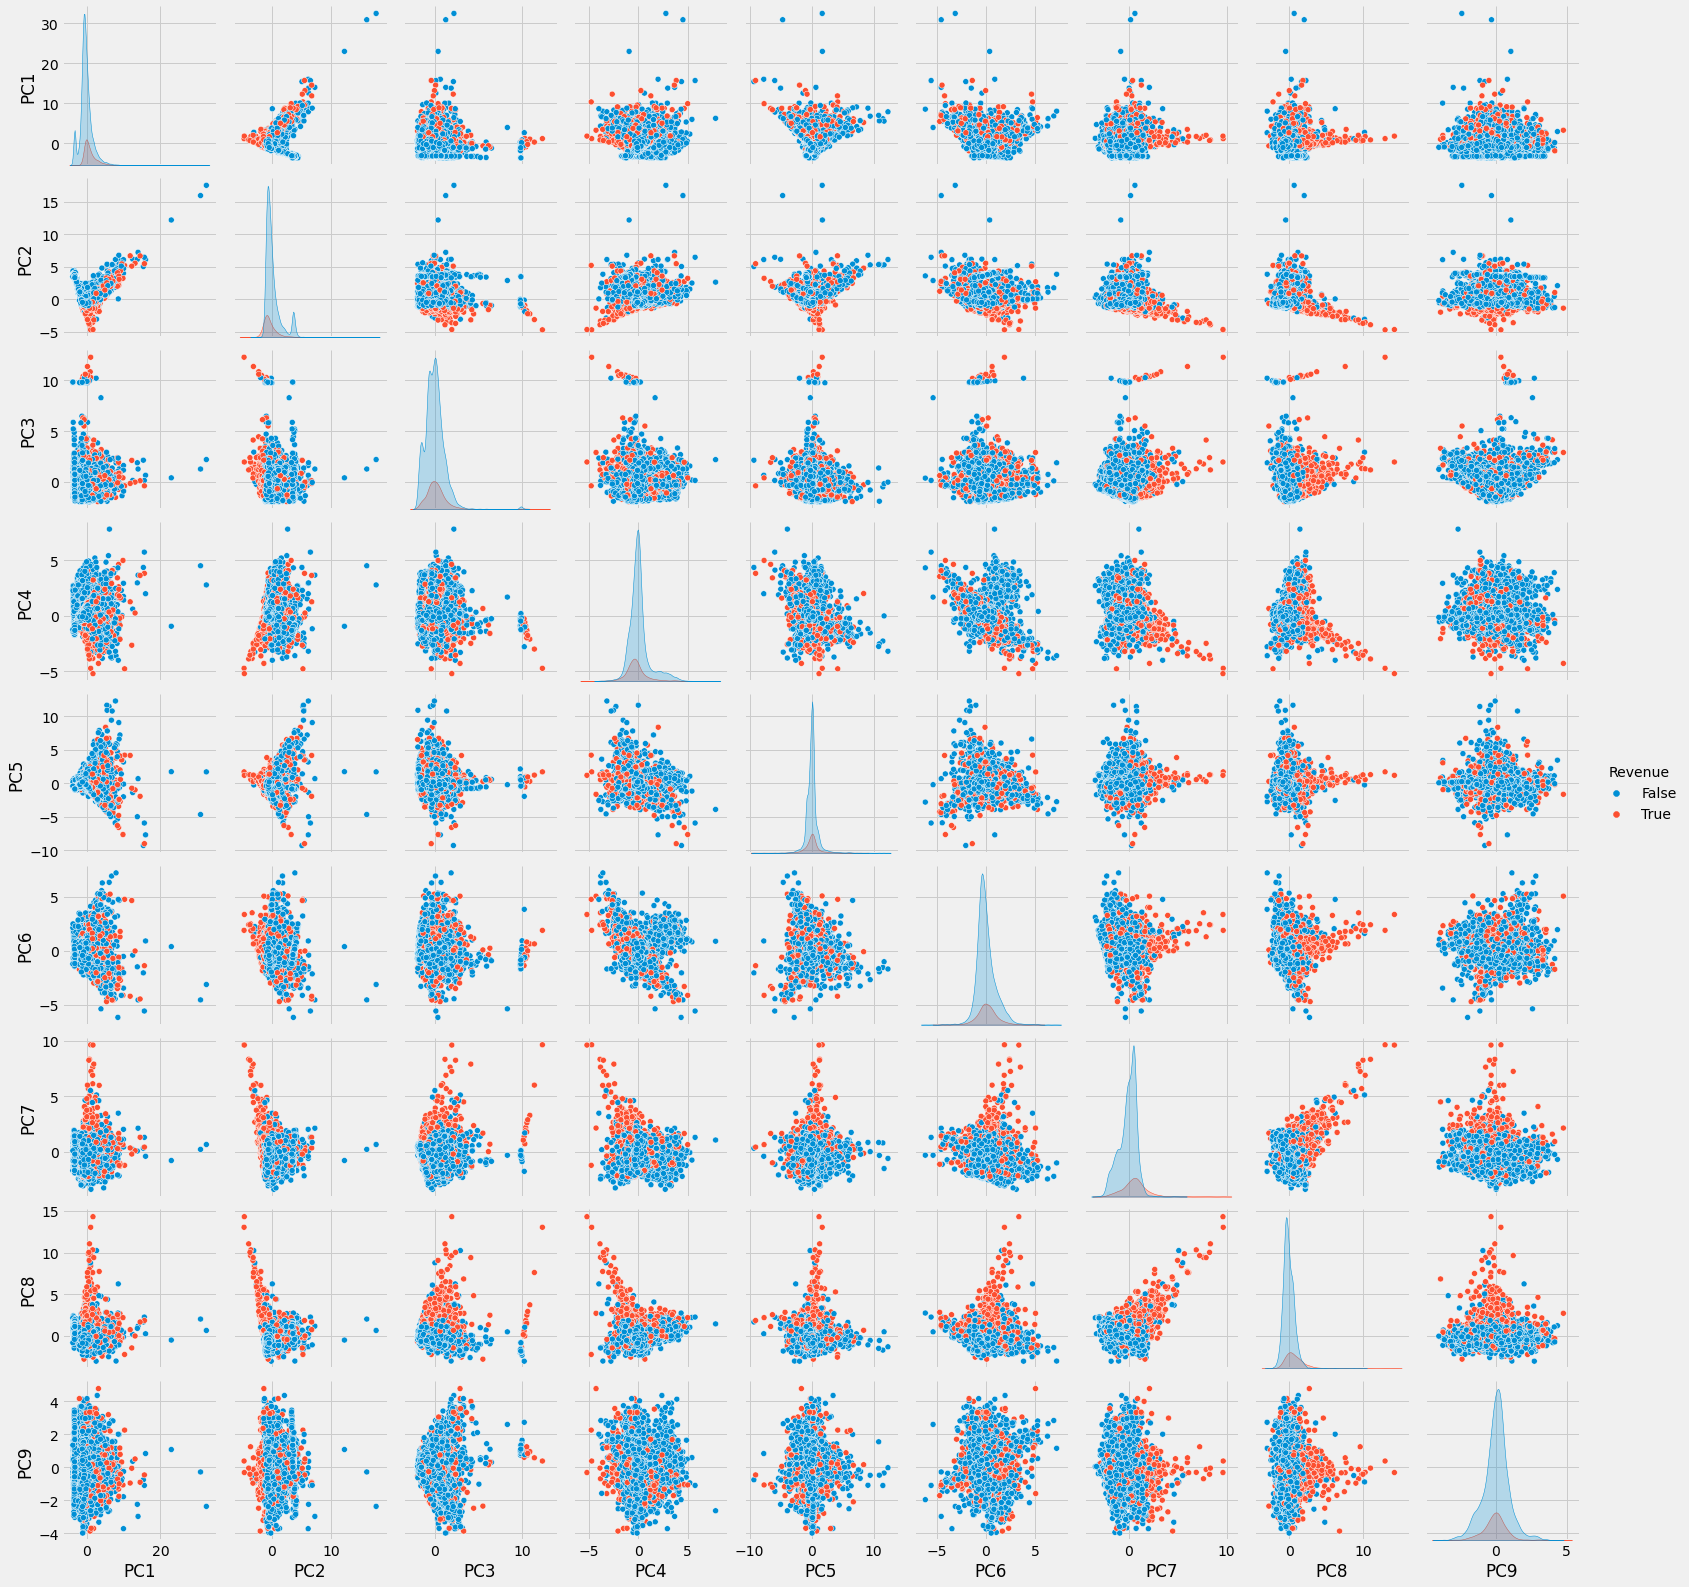

In [48]:
sns.pairplot(df_pca,diag_kind='kde',hue = 'Revenue')